In [48]:
import numpy as np
import pandas as pd
#import pandas_profiling as pp
import copy

data = pd.read_csv("E://UIUC/577/milestone/hotel_bookings.csv")
dataCopy = copy.deepcopy(data)
#profile = pp.ProfileReport(data)
#profile.to_file("output_file.html")

In [49]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# data preprocessing

In [50]:
data.isnull().sum(axis=0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [51]:
# "children", no children check-in by default, fill it with 0-or fill it with mode
data['children'].fillna(data['children'].mode()[0],inplace=True)
#"country", fill it with mode
data['country'].fillna(value=data['country'].mode()[0],inplace=True)
#delete "company", missing rate reaches more than 90%
data.drop('company',axis=1,inplace=True)
#"agent" fill it with 0 --> individual customers
data['agent'].fillna(0,inplace=True)
#check
data.isnull().sum(axis=0)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [52]:
#outlier（like. adr<0）
outlier = data["adr"][data["adr"].map(lambda x: True if x < 0  else False)]
print(outlier)
data.drop(axis=0, index = 14969, inplace=True)

#delete row of adults & children & babies=0
nonGuest = data[data[["adults", "children", "babies"]].sum(axis=1)==0]
data.drop(nonGuest.index, inplace=True)

#stays_in_weekend_nights & stays_in_week_nights = 0
nonStay = data[data[['stays_in_weekend_nights', 'stays_in_week_nights']].sum(axis=1) == 0]
data.drop(nonStay.index, inplace=True)

#meal--Undefined/SC – no meal package
data.meal.replace("Undefined", "SC", inplace=True)

# in market_segment, replaced undefined values by mode
data.market_segment.replace('Undefined',data['market_segment'].mode()[0], inplace=True)

#in distribution_channel, replaced undefined values by mode
data.distribution_channel.replace('Undefined',data['distribution_channel'].mode()[0], inplace=True)

14969   -6.38
Name: adr, dtype: float64


In [53]:
#see from the boxplot, there is an outlier
#  delete the outlier(= max_value) in adr
maxValue = max(data.adr)
location = data[(data.adr==maxValue)].index.tolist()
data.drop(axis=0, index = location, inplace=True)
#or replaced by mode
#data.adr.replace(maxValue, data.adr.mode()[0], inplace=True)

In [54]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118563 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118563 non-null  object 
 1   is_canceled                     118563 non-null  int64  
 2   lead_time                       118563 non-null  int64  
 3   arrival_date_year               118563 non-null  int64  
 4   arrival_date_month              118563 non-null  object 
 5   arrival_date_week_number        118563 non-null  int64  
 6   arrival_date_day_of_month       118563 non-null  int64  
 7   stays_in_weekend_nights         118563 non-null  int64  
 8   stays_in_week_nights            118563 non-null  int64  
 9   adults                          118563 non-null  int64  
 10  children                        118563 non-null  float64
 11  babies                          118563 non-null  int64  
 12  meal            

In [55]:
from sklearn.preprocessing import LabelEncoder
# delete "reservation_status_date" for its special data type
train.drop("reservation_status_date", axis=1, inplace=True)

num = [
    'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
    'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
    'babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes','agent', 'days_in_waiting_list', 'required_car_parking_spaces',
    'total_of_special_requests', 'adr'
]

cat = [
    'hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
    'distribution_channel', 'reserved_room_type', 'deposit_type',
    'customer_type','assigned_room_type','reservation_status'
]

target = ['is_canceled']


ref = num+cat+target
train = data[ref]
#处理类别变量
train[cat]=train[cat].apply(LabelEncoder().fit_transform)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


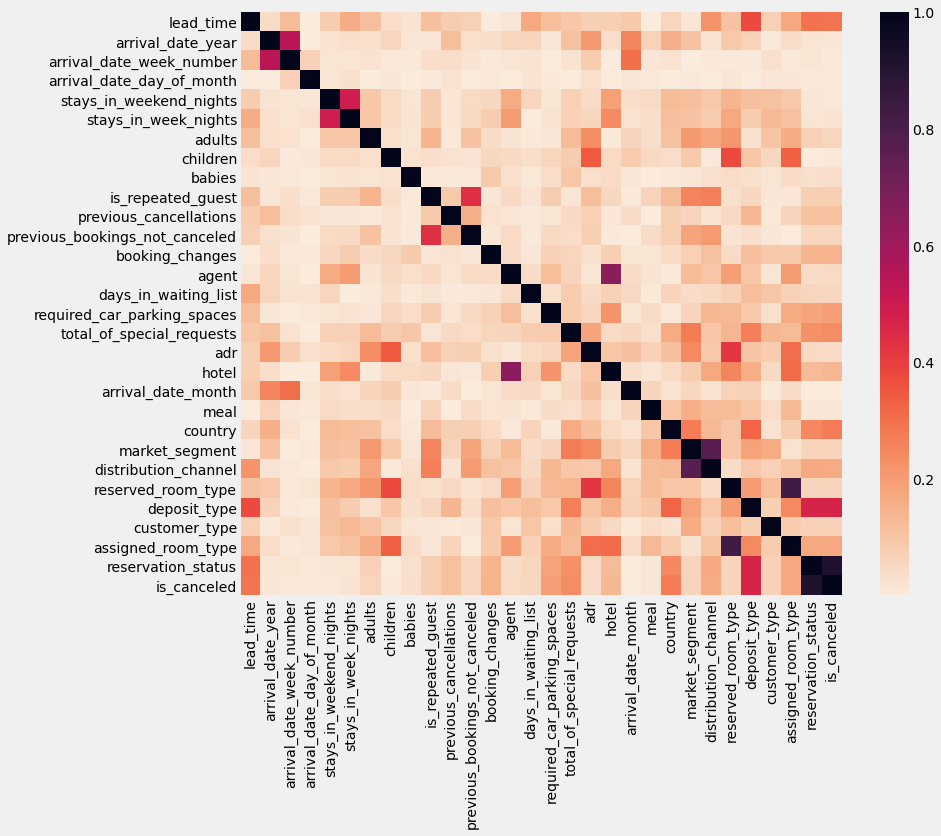

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
#OneHotEncoder( sparse=False ).fit_transform(train[obj].reshape(-1,1))
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr().abs(), cmap=sns.cm.rocket_r)

In [57]:
train.corr()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,assigned_room_type,reservation_status,is_canceled
lead_time,1.000000,0.039613,0.127881,0.002475,0.082894,0.163141,0.116980,-0.038276,-0.021035,-0.116184,...,0.002905,0.055063,0.012151,0.220090,-0.106839,0.375267,0.072780,-0.169872,-0.300573,0.291532
arrival_date_year,0.039613,1.000000,-0.540307,0.000338,0.020226,0.029226,0.030286,0.054992,-0.013047,0.012369,...,0.066491,-0.153857,0.108904,0.022726,0.093318,-0.065515,-0.006892,0.038945,-0.016473,0.015448
arrival_date_week_number,0.127881,-0.540307,1.000000,0.066590,0.019203,0.016814,0.026912,0.005749,0.010163,-0.033111,...,-0.014559,0.025246,-0.000326,0.006232,-0.008148,0.004154,-0.028155,-0.007505,-0.017939,0.009023
arrival_date_day_of_month,0.002475,0.000338,0.066590,1.000000,-0.016360,-0.028678,-0.001414,0.014485,-0.000225,-0.005193,...,-0.008314,-0.000676,-0.004308,0.001505,0.017376,-0.001448,0.012209,0.013216,0.011491,-0.006127
stays_in_weekend_nights,0.082894,0.020226,0.019203,-0.016360,1.000000,0.490952,0.093893,0.045985,0.018683,-0.078386,...,0.043575,-0.126213,0.115498,0.092002,0.143734,-0.113901,-0.111281,0.092570,0.011827,-0.004829
stays_in_week_nights,0.163141,0.029226,0.016814,-0.028678,0.490952,1.000000,0.095039,0.044449,0.020500,-0.083609,...,0.033335,-0.117845,0.108785,0.085709,0.171433,-0.080155,-0.130381,0.110024,-0.017349,0.020725
adults,0.116980,0.030286,0.026912,-0.001414,0.093893,0.095039,1.000000,0.028882,0.017751,-0.143295,...,0.033499,-0.109027,0.208068,0.177689,0.214791,-0.030291,-0.102650,0.163161,-0.069562,0.057574
children,-0.038276,0.054992,0.005749,0.014485,0.045985,0.044449,0.028882,1.000000,0.024181,-0.031657,...,-0.049665,-0.039120,0.087090,0.007547,0.379134,-0.096611,-0.053706,0.335883,-0.002955,0.004679
babies,-0.021035,-0.013047,0.010163,-0.000225,0.018683,0.020500,0.017751,0.024181,1.000000,-0.009120,...,0.002496,0.005478,-0.015284,-0.027903,0.039041,-0.030575,-0.016161,0.043024,0.031178,-0.032672
is_repeated_guest,-0.116184,0.012369,-0.033111,-0.005193,-0.078386,-0.083609,-0.143295,-0.031657,-0.009120,1.000000,...,-0.062833,0.124702,-0.255274,-0.267922,-0.028959,-0.054630,-0.013772,0.014391,0.077206,-0.077764


In [58]:
# delete "reservation_status" for its extremely high correlation with "is_canceled"
train.drop("reservation_status", axis=1, inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Feature Engineering

lead_time                         0.001190
arrival_date_year                 0.000000
arrival_date_week_number         -0.000000
arrival_date_day_of_month        -0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000000
babies                           -0.000000
is_repeated_guest                -0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled   -0.000000
booking_changes                  -0.000000
agent                            -0.000118
days_in_waiting_list             -0.000000
required_car_parking_spaces      -0.000000
total_of_special_requests        -0.000000
adr                               0.000432
hotel                            -0.000000
arrival_date_month               -0.000000
meal                              0.000000
country                           0.002343
market_segment                    0.000000
distributio

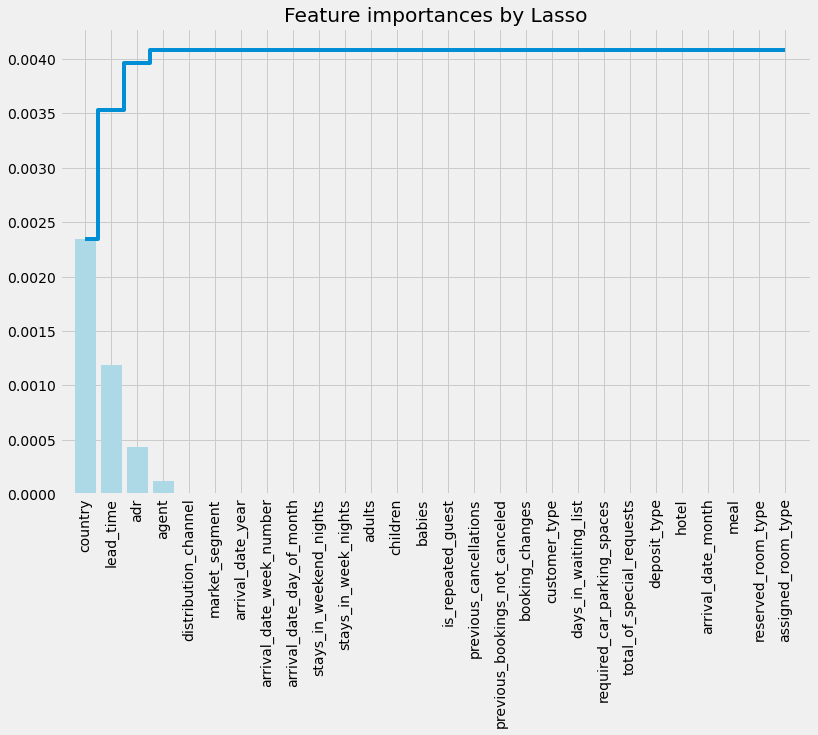

In [59]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score


feature = list(train.columns)
feature.remove('is_canceled')
x_values=train[feature]
y_values=data['is_canceled']


model_lasso = LassoCV(alphas = [0.1,1,0.001, 0.0005]).fit(x_values, y_values)


coef = pd.Series(model_lasso.coef_, index = feature)
print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  
names = train[feature].columns
importances = np.abs(model_lasso.coef_)
feat_names = names
indices = np.argsort(importances)[::-1]  
fig = plt.figure(figsize=(12,8))
plt.title("Feature importances by Lasso")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

lead_time                         1.102208e-01
arrival_date_year                 7.029131e-10
arrival_date_week_number          6.563336e-06
arrival_date_day_of_month         2.172965e-06
stays_in_weekend_nights           2.939320e-07
stays_in_week_nights              7.264057e-06
adults                            6.996713e-06
children                          3.969126e-07
babies                            1.512962e-05
is_repeated_guest                 6.958201e-05
previous_cancellations            1.174410e-03
previous_bookings_not_canceled    6.443465e-04
booking_changes                   4.654364e-04
agent                             3.898844e-03
days_in_waiting_list              4.602763e-03
required_car_parking_spaces       4.418806e-04
total_of_special_requests         7.275874e-04
adr                               4.220387e-04
hotel                             1.451525e-04
arrival_date_month                2.451963e-08
meal                              5.620573e-06
country      

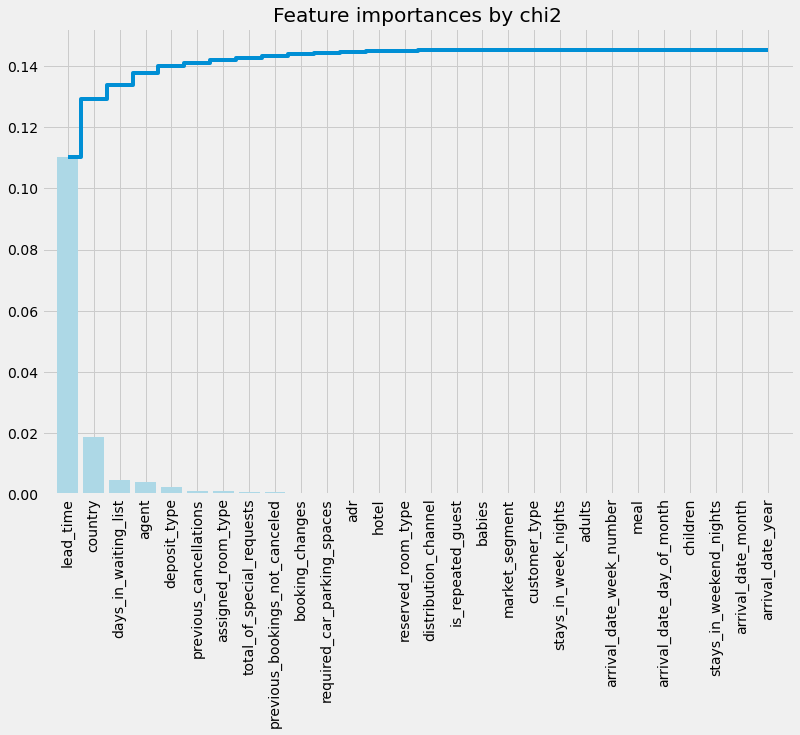

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
model_chi2 = SelectKBest(chi2, k='all').fit(x_values, y_values)

coef = pd.Series((model_chi2.scores_)/10**7, index = feature)
print(coef)
print("chi2 picked " + str(sum(coef >= 10**(-6))) + " variables and eliminated the other " +  str(sum(coef < 10**(-6))) + " variables")


import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  
names = train[feature].columns
importances = np.abs((model_chi2.scores_)/10**7)
feat_names = names
indices = np.argsort(importances)[::-1]  
fig = plt.figure(figsize=(12,8))
plt.title("Feature importances by chi2")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

('lead_time', 0.13274894527095366)
('arrival_date_year', 0.022982454760274124)
('arrival_date_week_number', 0.049385538492075186)
('arrival_date_day_of_month', 0.053238247531463986)
('stays_in_weekend_nights', 0.02219639013375068)
('stays_in_week_nights', 0.034017837294397515)
('adults', 0.0121869342166511)
('children', 0.005697398503823255)
('babies', 0.0006925416367898762)
('is_repeated_guest', 0.001879442716592232)
('previous_cancellations', 0.036406156836375006)
('previous_bookings_not_canceled', 0.004042057360030807)
('booking_changes', 0.021231109848084538)
('agent', 0.04999832165359012)
('days_in_waiting_list', 0.0014147395598205297)
('required_car_parking_spaces', 0.02181178441348997)
('total_of_special_requests', 0.062281879096553874)
('adr', 0.06863772358995394)
('hotel', 0.00749426093987067)
('arrival_date_month', 0.026302632929630698)
('meal', 0.01128632481498267)
('country', 0.1160682257270645)
('market_segment', 0.056305593761746264)
('distribution_channel', 0.01001763151

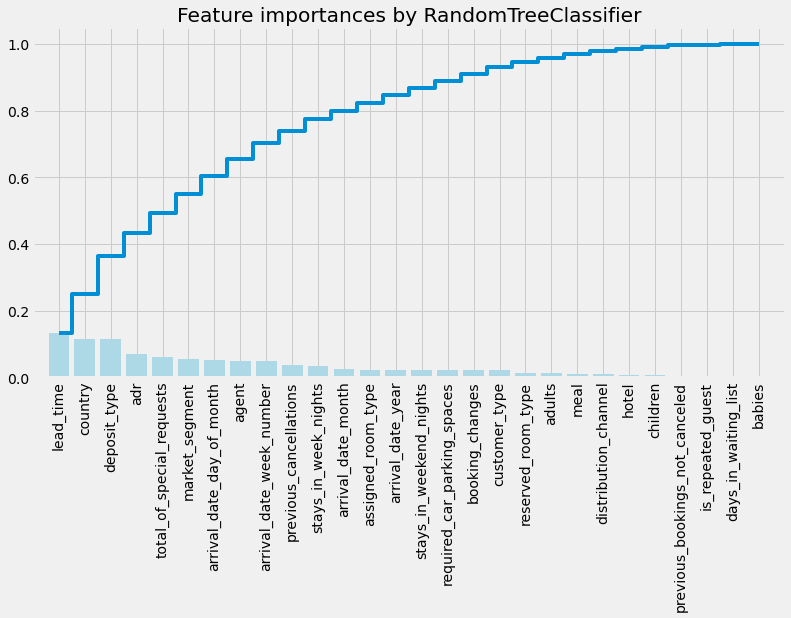

In [61]:
from sklearn.ensemble import RandomForestClassifier
names = data[feature].columns
clf=RandomForestClassifier(n_estimators=10,random_state=0)
clf.fit(x_values, y_values) 
for feature in zip(names, clf.feature_importances_):
    print(feature)

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

## Before

In [62]:
from sklearn.model_selection import train_test_split
# https://www.kaggle.com/duygut/eda-booking-cancelation-prediction
# Split original dataset -- train and test(7:3)
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, 
                                                    random_state=0, stratify = y_values)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold

kappa = []
accuracy = []
precision = []
recall = []
f1 = []
#using 4-fold cross-validation
skFold = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
for train_index, test_index in skFold.split(X_train,y_train):
    X_train_split, X_test_split=X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_split, y_test_split=y_train.iloc[train_index], y_train.iloc[test_index]
    RF = RandomForestClassifier(random_state=0, min_samples_leaf = 4, 
                             min_samples_split = 10)
    RF.fit(X_train_split, y_train_split)
    kappa.append(cohen_kappa_score(y_test_split, RF.predict(X_test_split)))
    accuracy.append(accuracy_score(y_test_split, RF.predict(X_test_split)))
    precision.append(precision_score(y_test_split, RF.predict(X_test_split)))
    recall.append(recall_score(y_test_split, RF.predict(X_test_split)))
    f1.append(f1_score(y_test_split, RF.predict(X_test_split)))
#input kappa, % correct, precision, and recall
print("kappa score: {}".format(np.mean(kappa)))
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))

kappa score: 0.7382235921232063
accuracy: 0.8802323424656208
precision: 0.8792076219750841
recall: 0.7866246055304303
f1: 0.8303273949261645


In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import cohen_kappa_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold

kappa = []
accuracy = []
precision = []
recall = []
f1 = []

#using 4-fold cross-validation
skFold = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
for train_index, test_index in skFold.split(X_train,y_train):
    X_train_split, X_test_split=X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_split, y_test_split=y_train.iloc[train_index], y_train.iloc[test_index]
    NB = GaussianNB()
    NB.fit(X_train_split, y_train_split)
    kappa.append(cohen_kappa_score(y_test_split, NB.predict(X_test_split)))
    accuracy.append(accuracy_score(y_test_split, NB.predict(X_test_split)))
    precision.append(precision_score(y_test_split, NB.predict(X_test_split)))
    recall.append(recall_score(y_test_split, NB.predict(X_test_split)))
    f1.append(f1_score(y_test_split, NB.predict(X_test_split)))


#input kappa, % correct, precision, and recall
print("kappa score: {}".format(np.mean(kappa)))
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))

kappa score: 0.2171346931251531
accuracy: 0.5602574885368476
precision: 0.4548389301091028
recall: 0.9055685950767253
f1: 0.6054823116760644


In [65]:
from sklearn.metrics import classification_report
print("RF", classification_report(y_test, RF.predict(X_test)))
from sklearn.metrics import classification_report
print("NB", classification_report(y_test, NB.predict(X_test)))

RF               precision    recall  f1-score   support

           0       0.88      0.94      0.91     22316
           1       0.89      0.79      0.83     13253

    accuracy                           0.88     35569
   macro avg       0.88      0.86      0.87     35569
weighted avg       0.88      0.88      0.88     35569

NB               precision    recall  f1-score   support

           0       0.87      0.36      0.51     22316
           1       0.46      0.91      0.61     13253

    accuracy                           0.57     35569
   macro avg       0.66      0.64      0.56     35569
weighted avg       0.71      0.57      0.55     35569



## after

In [66]:
# remove "babies", "children", "meal", "is_repeated_guest"

x_values.drop("babies",axis=1,inplace=True)
x_values.drop("children",axis=1,inplace=True)
x_values.drop("meal",axis=1,inplace=True)
x_values.drop("is_repeated_guest",axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, 
                                                    random_state=0, stratify = y_values)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold

kappa = []
accuracy = []
precision = []
recall = []
f1 = []
#using 4-fold cross-validation
skFold = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
for train_index, test_index in skFold.split(X_train,y_train):
    X_train_split, X_test_split=X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_split, y_test_split=y_train.iloc[train_index], y_train.iloc[test_index]
    RF = RandomForestClassifier(random_state=0, min_samples_leaf = 4, 
                             min_samples_split = 10)
    RF.fit(X_train_split, y_train_split)
    kappa.append(cohen_kappa_score(y_test_split, RF.predict(X_test_split)))
    accuracy.append(accuracy_score(y_test_split, RF.predict(X_test_split)))
    precision.append(precision_score(y_test_split, RF.predict(X_test_split)))
    recall.append(recall_score(y_test_split, RF.predict(X_test_split)))
    f1.append(f1_score(y_test_split, RF.predict(X_test_split)))
#input kappa, % correct, precision, and recall
print("kappa score: {}".format(np.mean(kappa)))
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))

kappa score: 0.7361809925663751
accuracy: 0.87941300206254
precision: 0.8799416150339006
recall: 0.783228950230277
f1: 0.8287501927019384


In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import cohen_kappa_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold

kappa = []
accuracy = []
precision = []
recall = []
f1 = []

#using 4-fold cross-validation
skFold = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
for train_index, test_index in skFold.split(X_train,y_train):
    X_train_split, X_test_split=X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_split, y_test_split=y_train.iloc[train_index], y_train.iloc[test_index]
    NB = GaussianNB()
    NB.fit(X_train_split, y_train_split)
    kappa.append(cohen_kappa_score(y_test_split, NB.predict(X_test_split)))
    accuracy.append(accuracy_score(y_test_split, NB.predict(X_test_split)))
    precision.append(precision_score(y_test_split, NB.predict(X_test_split)))
    recall.append(recall_score(y_test_split, NB.predict(X_test_split)))
    f1.append(f1_score(y_test_split, NB.predict(X_test_split)))


#input kappa, % correct, precision, and recall
print("kappa score: {}".format(np.mean(kappa)))
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))

kappa score: 0.27391799572255643
accuracy: 0.6069355413524822
precision: 0.4847362878129926
recall: 0.8608429872643578
f1: 0.6200949065251776


In [69]:
from sklearn.metrics import classification_report
print("RF", classification_report(y_test, RF.predict(X_test)))
from sklearn.metrics import classification_report
print("NB", classification_report(y_test, NB.predict(X_test)))

RF               precision    recall  f1-score   support

           0       0.88      0.94      0.91     22316
           1       0.89      0.78      0.83     13253

    accuracy                           0.88     35569
   macro avg       0.88      0.86      0.87     35569
weighted avg       0.88      0.88      0.88     35569

NB               precision    recall  f1-score   support

           0       0.85      0.46      0.60     22316
           1       0.49      0.86      0.62     13253

    accuracy                           0.61     35569
   macro avg       0.67      0.66      0.61     35569
weighted avg       0.71      0.61      0.61     35569

